Date and Time: (None, None)
Extracted Data (first few lines):
31
[[-2, 4, -4], [-2, 3, -3]]
[0.5, 0.3333333333333333]
Raw Data Filename: ['Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_108', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_109', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_110', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_111', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_112', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_113', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_04\\2025_04_11\\qudit_ramsey_scan_unbused_114', 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\202

IndexError: index 4 is out of bounds for axis 1 with size 4

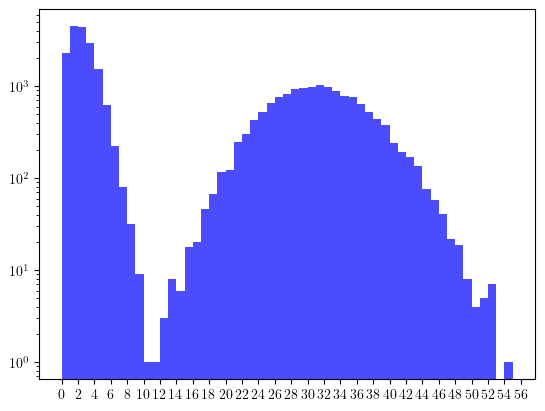

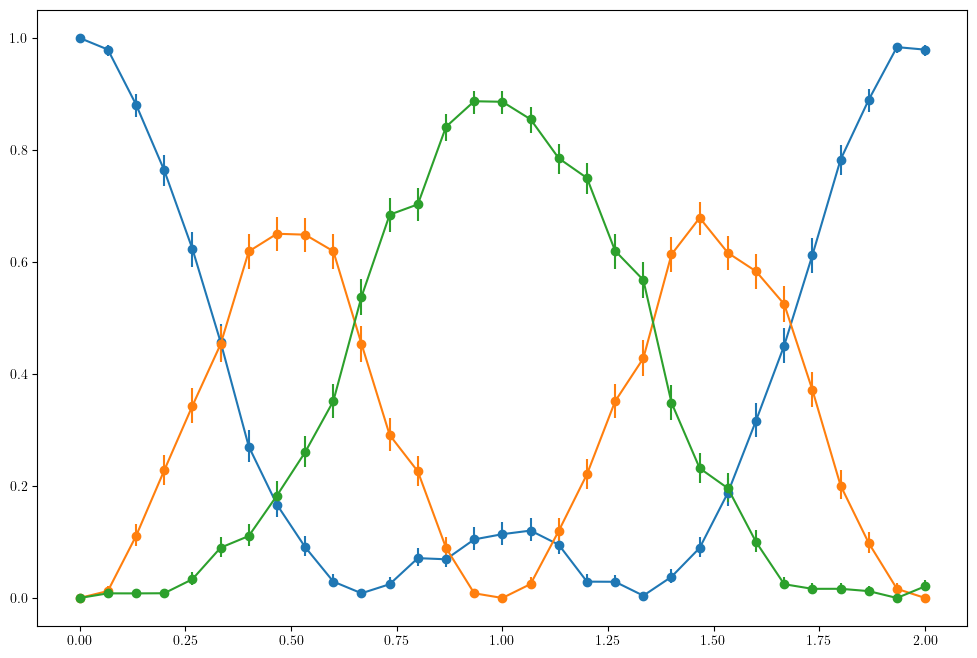

In [10]:
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
# Define the file path
file_path = 'Z:\\Lab Data\\25_level_coherence_paper_data\\qudit_Ramsey_phase_scans\\Ramsey_qudit_WaitTime1us_d=3_Cal_True_U1only_False_0_20250411_1239.txt'
# file_path = 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_PD\\Full_Ramsey_qudit_WaitTime1us_d=5_Cal_True_U1only_False_0_20250403_2212.txt'
# Function to parse the filename
def parse_filename(filename):
    pattern = r'us_(\d{8})_(\d{4})\.txt'
    match = re.search(pattern, filename)
    if match:
        date_str_ = match.group(1) + match.group(2)
        date_str = match.group(1) + '_' + match.group(2)
        date_time = datetime.strptime(date_str_, '%Y%m%d%H%M')
        return date_str,date_time
    else:
        return None, None

# Function to check if a line is a data line
def is_data_line(line):
    # A data line should be two numeric values separated by a comma
    parts = line.split(',')
    if len(parts) != 2:
        return False
    try:
        float(parts[0].strip())
        float(parts[1].strip())
        return True
    except ValueError:
        return False

# Function to read the file and extract data
def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the raw data filename from the last line
    raw_data_filename = lines[-1].strip()
    pi_times = lines[-3].strip()
    freqs = lines[-4].strip()
    # Extract data lines until we find a line that is not a data line
    data = []
    for line in lines:
        if is_data_line(line):
            data.append(line.strip().split(','))
        else:
            break
    
    return data, raw_data_filename,pi_times, freqs

# Parse the filename
filename = file_path.split('/')[-1]
date_str,date_time = parse_filename(filename)

# Extract data from the file
data, raw_data_filename,probe_trans,freqs = extract_data(file_path)


print(f"Date and Time: {date_str,date_time}")
print("Extracted Data (first few lines):")
times_exp = []

for row in data:
    times_exp.append(float(row[0]))
print(len(times_exp))
# print(times_exp)
print(probe_trans)
print(freqs)
print(f"Raw Data Filename: {raw_data_filename}")
print(len(raw_data_filename))

import re
from datetime import datetime

# Define the file path
file_path = file_path

# Function to parse the filename
def parse_filename(filename):
    pattern = r'_(Dimension)_(\d+)_(\d{8})_(\d{4})\.txt'
    match = re.search(pattern, filename)
    if match:
        dimension = int(match.group(2))
        date_str = match.group(3) + match.group(4)
        date_time = datetime.strptime(date_str, '%Y%m%d%H%M')
        return dimension, date_time
    else:
        return None, None

# Function to check if a line is a data line
def is_data_line(line):
    # A data line should be two numeric values separated by a comma
    parts = line.split(',')
    if len(parts) != 2:
        return False
    try:
        float(parts[0].strip())
        float(parts[1].strip())
        return True
    except ValueError:
        return False

# Function to read the file and extract data
def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the raw data filenames from the last line and convert to a list
    raw_data_filenames_line = lines[-1].strip()
    raw_data_filenames = [name.strip().strip("'\"") for name in raw_data_filenames_line.strip('[]').split(',')]
    
    # Extract data lines until we find a line that is not a data line
    data = []
    for line in lines:
        if is_data_line(line):
            data.append(line.strip().split(','))
        else:
            break
    
    return data, raw_data_filenames

# Parse the filename
filename = file_path.split('/')[-1]
dimension, date_time = parse_filename(filename)

# Extract data from the file
num_data, raw_data_filenames = extract_data(file_path)

# Output the results
print(f"Dimensions: {dimension}")
print(f"Date and Time: {date_time}")

# for row in num_data:
#     print(row)
# print("Raw Data Filenames:")
Z_drive_raw_data = ''
raw_data_filepaths = []
for raw_filename in raw_data_filenames:
    print(raw_filename)
    raw_data_filepaths.append(Z_drive_raw_data+raw_filename)
print(len(raw_data_filepaths))

arrays = []
for i, name in enumerate(raw_data_filepaths):
    file_path = name
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            arrays.append(data[0]["0"])

hist_data = np.array(arrays)
flat_hist_data = hist_data.ravel()
plt.figure()
plt.hist(flat_hist_data, color='blue',bins = int(max(flat_hist_data)), alpha=0.7)
plt.xticks(np.arange(0, max(flat_hist_data)+2, 2))
plt.yscale('log')
print(max(flat_hist_data))

# def getShelvingThreshold(counts):
#     data_sorted = np.sort(counts, axis=None)
#     data_sorted = data_sorted[100:-100]
#     if len(data_sorted) > 1000:
#         data_sorted = data_sorted[0:-1: round (data_sorted.size/(len(counts)*0.0250167))]
#     data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
#     # data_sorted_diff = np.diff(data_sorted)
#     # print(data_sorted_diff)
#     data_diff_max = max(data_sorted_diff)
#     data_diff_maxind = np.argmax(data_sorted_diff)
#     threshold = data_diff_max/2 + data_sorted[data_diff_maxind]
#     return threshold, data_sorted

def getShelvingThreshold(counts):
    data_sorted = np.sort(counts, axis=None)
    print("Total sorted data points:", len(data_sorted))
    # Remove extreme ends (if possible)
    if len(data_sorted) > 4000:
        data_sorted = data_sorted[2000:-2000]
    if len(data_sorted) > 2000:
        step = round(data_sorted.size / (len(counts) * 0.0250167))
        if step < 1:
            step = 1
        data_sorted = data_sorted[0:-1:step]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    
    # New logic: if the calculated threshold is less than 2, recalculate using histogram data.
    if threshold < 2:
        # Calculate histogram in the x-range 4 to 30
        hist_counts, bin_edges = np.histogram(counts, bins=range(4, 31))
        # Find the bin (lowest bar) with the minimum count in that range
        min_bin_index = np.argmin(hist_counts)
        # Use the lower edge of that bin as the threshold
        threshold = bin_edges[min_bin_index]
        print(f"Threshold recalculated using histogram: {threshold}")
    
    return threshold, data_sorted

threshold,_ = getShelvingThreshold(flat_hist_data)
print(threshold)

arrays_3d = []
for file_path in raw_data_filepaths:
    arrays = []
    with open(file_path, 'r') as file:
        # print(file_path)
        for line in file:
            data = json.loads(line)
            arrays.append(data[0]["0"][:])
    arrays_3d.append(arrays)
# print(np.array(arrays_3d).shape)
bool_array = np.array(arrays_3d) > 7
bool_matrix = bool_array
result_matrix = np.full(bool_matrix.shape, False, dtype=bool)
# print(bool_matrix.shape)
not_all_darks = []
num_points = len(num_data)
# print(num_points)
for matrix_index in range(bool_matrix.shape[0]):
    for row_index in range(bool_matrix.shape[1]):
        true_indices = np.where(bool_matrix[matrix_index, row_index, :])
        if true_indices[0].size > 0:
            first_true_index = true_indices[0]
            if first_true_index[0] != 0 :#and first_true_index[0] != 1:
                result_matrix[matrix_index, row_index, first_true_index[0]] = True
print(len(result_matrix))
filtered_data_array = []
percentage_data_used = []
for i in range(num_points):
    data = result_matrix[i]
    rows_with_any_true = data.any(axis=1)
    filtered_data = data[rows_with_any_true]
    filtered_data_array.append(filtered_data)
    percentage_data_used.append(filtered_data.shape[0] / data.shape[0])
    print(i, data.shape[0] - filtered_data.shape[0], filtered_data.shape[0], raw_data_filenames[i])


def find_errors(num_SD, full_data_array, exp_num):
    upper_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                   (1 + (num_SD**2 / exp_num))) + (np.sqrt(
                       ((full_data_array *
                         (1 - full_data_array) * num_SD**2) / exp_num) +
                       (num_SD**4 /
                        (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))

    lower_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                   (1 + (num_SD**2 / exp_num))) - (np.sqrt(
                       ((full_data_array *
                         (1 - full_data_array) * num_SD**2) / exp_num) +
                       (num_SD**4 /
                        (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))

    return lower_error, upper_error

ket_data = []
exp_num_data = []

len(filtered_data_array)
for i in filtered_data_array:
    ket_data.append(np.mean(i, axis=0))
    exp_num_data.append(len(i))
ket_data = np.array(ket_data)
exp_num_array = np.zeros(ket_data.shape)
for i in range(ket_data.shape[1]):
    exp_num_array[:,i] =  np.array(exp_num_data)


ket_data = np.array(ket_data)
lower, upper = find_errors(1, np.array(ket_data), exp_num_array)

# Calculate the error bars
yerr = [np.abs(ket_data - lower), np.abs(upper - ket_data)]
 
# print(ket_data)
# Set figure size here
ket_data = np.array(ket_data)
print(len(ket_data))
#print((np.mean(ket_data[:,0])-1/3)*3,np.mean(ket_data[:,1]) - 1/3)*3,np.mean(ket_data[:,2])-1/3,np.mean(ket_data[:,0])+np.mean(ket_data[:,1])+np.mean(ket_data[:,2]))
avgs = np.mean(ket_data, axis = 0)
# print(3*(avgs-1/3))
# Define a color palette
# colors = plt.cm.get_cmap('tab10', len(ket_data)).colors
# Define the colors manually
colors = ['red', 'green', 'blue']
T = 100

states = [[-1],[-2, 3, -2], [-1, 3, -1], [-1, 3, 0], [-1, 4, -3]]
# states = [[1],[1, 4, -1], [-1, 3, 0], [1, 2, -1]]
# states = [[-1]]+ probe_trans

import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

plot_indices = [1, 2, 3, 4, 5]  # indices to plot from ket_data
plot_labels = [f'{i}' for i in range(len(plot_indices))]  # custom labels like '0', '1', '2', '3', '4'

plt.figure(figsize=(12, 8))

for j, i in enumerate(plot_indices):
    plt.errorbar(
        np.array(times_exp[:])/50,
        ket_data[:, i],
        yerr=[yerr[0][:, i], yerr[1][:, i]],
        fmt='-o',
        # label=rf'|{plot_labels[j]}⟩'
        label= rf'$|{j}\rangle$ - $|D_{{5/2}}, \tilde{{F}} = {states[j][1]}, m_{{\tilde{{F}}}} = {states[j][2]}\rangle$' if len(states[j])>1 else rf'$|{j}\rangle$ - $|S_{{1/2}}, F = 2, m_F = {states[j][0]}\rangle$')
    

plt.xlabel('Phase ($\pi$)', fontsize=14)
plt.ylabel('Population',  fontsize=14)
plt.title(f'{len(plot_indices)} Level Qudit Phase Ramsey Scan', fontsize=18)
plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.tight_layout()
plt.savefig(f'Ramsey_{len(plot_indices)}_level_Qudit_{date_str}.png', dpi=300)
plt.show()


# Simulations

In [13]:
import numpy as np 
from scipy.io import loadmat
transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

import numpy as np

transition_strengths = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\Transition_strengths_4p216.txt',delimiter=',')  # Assumes space-delimited file
transition_strengths[transition_strengths == 0] = np.nan
# print(transition_strengths)


pi_t = [19.470, 35.554, 41.166, 30.108, 39.326]
strengths = np.array([transition_strengths[23,0],transition_strengths[14,0],transition_strengths[17,4],transition_strengths[16,4],transition_strengths[15,4]])
pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

pi_t = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])
factors = pi_t * strengths
Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):

            delta_m = (row_labels[i][1]-col_labels[j])+2

            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
print(pi_times)
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

def get_pulse_schedule(rabi_freqs, fractions):
    if len(rabi_freqs) != len(fractions):
        raise ValueError("rabi_freqs and fractions must have the same length.")
    
    times = []
    t_current = 0.0  # microseconds (start at time=0)
    
    for Omega, frac in zip(rabi_freqs, fractions):
        if not 0 <= frac <= 1:
            raise ValueError(f"Fraction must be between 0 and 1, got {frac}.")
        
        # Calculate the rotation angle and the pulse duration
        theta = 2.0 * np.arcsin(np.sqrt(frac))   # in radians
        t_pulse = theta / Omega if Omega > 0 else 0.0  # microseconds (if Omega in MHz)
        
        # The pulse starts at t_current, ends at t_current + t_pulse
        t_start = t_current
        t_end = t_current + t_pulse
        
        times.append((t_start, t_end))
        t_current = t_end  # next pulse starts after this one finishes
    
    return times

mat_data = loadmat('sensitivity_matrix_4p216G.mat')

matrix_sen_24x5 = mat_data['S']
matrix_sen_24x5[np.isnan(transition_strengths)] = np.nan
np.savetxt('sensitivities_4p216.txt',matrix_sen_24x5, delimiter=',')
sens_matrix = np.loadtxt('Z:\Lab Data\Phase_and_freq_correction_180Hz\sensitivities_4p216.txt',delimiter=',')
print(sens_matrix)
# print(matrix_sen_24x5)

[[   0.          228.7860679   146.70858273  185.6977463   279.78614551]
 [ 171.29894743  328.57989534 1001.78601904  283.54526723  113.94791807]
 [ 152.22381668  161.06117267  202.89504337  179.69979054    0.        ]
 [   0.            0.          116.83754357   76.03212913  117.58969397]
 [   0.          101.23320797  293.309124    157.25094076   97.15369017]
 [ 132.46353226  127.00971471  104.80789052  369.35517566   68.46129229]
 [  69.40127291  342.19424267  165.67133289   59.65046912    0.        ]
 [  87.16094467   90.23574673   78.42244334    0.            0.        ]
 [   0.            0.            0.           45.81804306  891.25829044]
 [   0.            0.           56.33763437   52.0840813   232.16007553]
 [   0.           84.97725266   37.80136382  138.20262259  213.75644699]
 [ 168.97003438   40.18381737   55.3368178  3138.42652759  177.79525786]
 [  59.04958513   40.96376233  123.33321062  163.74703686    0.        ]
 [  42.98788057   54.05912362  603.65515112    0.  

FileNotFoundError: [Errno 2] No such file or directory: 'sensitivity_matrix_4p216G.mat'